In [1]:
import copy
import io
import pickle
import re
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import pandas as pd
import stanfordnlp

import preprocessing

In [2]:
nlp = stanfordnlp.Pipeline(lang="tr")

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/Users/atakan1/stanfordnlp_resources/tr_imst_models/tr_imst_tokenizer.pt', 'lang': 'tr', 'shorthand': 'tr_imst', 'mode': 'predict'}
---
Loading: mwt
With settings: 
{'model_path': '/Users/atakan1/stanfordnlp_resources/tr_imst_models/tr_imst_mwt_expander.pt', 'lang': 'tr', 'shorthand': 'tr_imst', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
---
Loading: pos
With settings: 
{'model_path': '/Users/atakan1/stanfordnlp_resources/tr_imst_models/tr_imst_tagger.pt', 'pretrain_path': '/Users/atakan1/stanfordnlp_resources/tr_imst_models/tr_imst.pretrain.pt', 'lang': 'tr', 'shorthand': 'tr_imst', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/Users/atakan1/stanfordnlp_resources/tr_imst_models/tr_imst_lemmatizer.pt', 'lang': 'tr', 'shorthand': 'tr_imst', 'mode': 'predict'}
Building an attentional Seq2Seq model..

In [3]:
QUESTION_GROUPS_PATH = "../preprocessed_data/question_groups.pickle"
PASSAGES_PATH = "../preprocessed_data/passages.pickle"
WORD_VECTORS_PATH = "../cc.tr.300.vec"

In [4]:
with open(PASSAGES_PATH, "rb") as f:
    passages = pickle.load(f)

In [5]:
with open(QUESTION_GROUPS_PATH, "rb") as f:
    question_groups = pickle.load(f)

In [6]:
q_number = 10

In [7]:
sent = question_groups[q_number].questions[0].text.sentences[0]

In [8]:
question_groups[q_number].questions[0].text.text

'Ülkemizde bakır yatakları nerelerde bulunmaktadır?'

In [9]:
sent.dependencies

[(<Word index=5;text=bulunmaktadır;lemma=bulun;upos=VERB;xpos=Verb;feats=Aspect=Prog|Mood=Gen|Number=Sing|Person=3|Polarity=Pos|Polite=Form|Tense=Pres;governor=0;dependency_relation=root>,
  'obl',
  <Word index=1;text=Ülkemizde;lemma=ülke;upos=NOUN;xpos=Noun;feats=Case=Loc|Number=Sing|Number[psor]=Plur|Person=3|Person[psor]=1;governor=5;dependency_relation=obl>),
 (<Word index=3;text=yatakları;lemma=yatak;upos=NOUN;xpos=Noun;feats=Case=Nom|Number=Plur|Number[psor]=Sing|Person=3|Person[psor]=3;governor=5;dependency_relation=nsubj>,
  'nmod:poss',
  <Word index=2;text=bakır;lemma=bakır;upos=NOUN;xpos=Noun;feats=Case=Nom|Number=Sing|Person=3;governor=3;dependency_relation=nmod:poss>),
 (<Word index=5;text=bulunmaktadır;lemma=bulun;upos=VERB;xpos=Verb;feats=Aspect=Prog|Mood=Gen|Number=Sing|Person=3|Polarity=Pos|Polite=Form|Tense=Pres;governor=0;dependency_relation=root>,
  'nsubj',
  <Word index=3;text=yatakları;lemma=yatak;upos=NOUN;xpos=Noun;feats=Case=Nom|Number=Plur|Number[psor]=Sing|

In [10]:
len(question_groups)

1499

# Question Processing

In [279]:
q_words = {
#     "hangisidir": [],
#     "hangi tarih": [],
#     "hangi yıl": [],
#     "hangi dönem": [],
#     "hangi çağ": [],
#     "hangi bölge": [],
#     "hangi il": [],
#     "hangi şehir": [],
#     "hangi ülke": [],
#     "hangi": [],
#     "ne denir": [],
#     "ne kadar": [],
#     "ne ad verilir": [],
#     "ne zaman":[],
#     "nedir": [],
#     "nelerdir": [],
#     "neden": [],
#     "nere": [],
#     "nasıl": [],
#     "kaç yıl": [],
#     "kaç": [],
#     "kim": [],
#     "ne": [],
#     "denir": [],
#     " mi": [],
#     " mı": [],
#     "other": []
    "nedir": [],
    "verilir": [],
    "hangisidir": [],
    "hangi": [],
    "denir": [],
    "kaç": [],
    "nasıl": [],
    "neden": [],
    "nere": [],
    "kadardır": [],
    "ne": [],
    "generic": [],
}

for qg in question_groups:
    for q in qg.questions:
        raw = q.text.text.casefold()
        classified = False
        for q_word in q_words:
            if not classified and q_word != "generic" and q_word in raw:
                q_words[q_word].append(q.idx)
                classified = True
                
        if not classified:
            q_words["generic"].append(q.idx)
     

In [280]:
total = 0
for _list in q_words.values():
    total += len(_list)

In [281]:
total

1795

In [282]:
_lens = []
_classes = list(q_words.keys())
for _class in _classes:
    _lens.append(len(q_words[_class]))

([<matplotlib.axis.XTick at 0x242f74b38>,
 <a list of 12 Text xticklabel objects>)

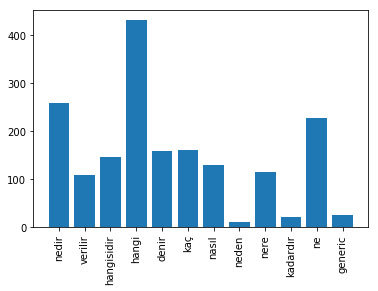

In [283]:
plt.bar(range(len(_classes)), _lens)
plt.xticks(range(len(_classes)), _classes, rotation=90)

In [284]:
question_dict = {}
for qg in question_groups:
    for q in qg.questions:
        question_dict[q.idx] = q, qg.answer, qg.related_par_id

In [215]:
ss = "Yeryüzündeki kayaçlar kaç ana grupta sınıflandırılır?"
dd = nlp(ss)

dd.sentences[0].print_dependencies()
dd.sentences[0].words

('Yeryüzünde', '3', 'nmod')
('ki', '1', 'case')
('kayaçlar', '7', 'nsubj')
('kaç', '6', 'amod')
('ana', '6', 'amod')
('grupta', '7', 'obl')
('sınıflandırılır', '0', 'root')
('?', '7', 'punct')


[<Word index=1;text=Yeryüzünde;lemma=yeryüzü;upos=NOUN;xpos=Noun;feats=Case=Loc|Number=Sing|Number[psor]=Sing|Person=3|Person[psor]=3;governor=3;dependency_relation=nmod>,
 <Word index=2;text=ki;lemma=ki;upos=ADP;xpos=Rel;feats=_;governor=1;dependency_relation=case>,
 <Word index=3;text=kayaçlar;lemma=kayaç;upos=NOUN;xpos=Noun;feats=Case=Nom|Number=Plur|Person=3;governor=7;dependency_relation=nsubj>,
 <Word index=4;text=kaç;lemma=kaç;upos=ADJ;xpos=Adj;feats=_;governor=6;dependency_relation=amod>,
 <Word index=5;text=ana;lemma=ana;upos=ADJ;xpos=Adj;feats=_;governor=6;dependency_relation=amod>,
 <Word index=6;text=grupta;lemma=grup;upos=NOUN;xpos=Noun;feats=Case=Loc|Number=Sing|Person=3;governor=7;dependency_relation=obl>,
 <Word index=7;text=sınıflandırılır;lemma=sınıflan;upos=VERB;xpos=Verb;feats=Aspect=Imp|Mood=Ind|Number=Sing|Person=3|Polarity=Pos|Tense=Aor|Voice=Pass;governor=0;dependency_relation=root>,
 <Word index=8;text=?;lemma=?;upos=PUNCT;xpos=Punc;feats=_;governor=7;dependenc

In [240]:
def find_root(sentence):
    for word in sentence.words:
        if word.governor == 0:
            return int(word.index)
    return 0


def find_subject(sentence):
    root_idx = find_root(sentence)
    subjects = []
    if root_idx > 0:
        for word in sentence.words:
            if word.governor == root_idx and word.dependency_relation == "nsubj":
                subjects.append(int(word.index))
                
    return subjects


def find_related_words(sentence, idx):
    idx_ = []

    while idx_ != idx:
        idx_ = copy.deepcopy(idx)
        for word in sentence.words:
            if word.governor in idx and int(word.index) not in idx:
                idx.append(int(word.index))
                
    return idx
            

def find_left_child(sentence, idx):
    for word in sentence.words:
        if word.governor == idx and word.dependency_relation == "obl":
            return int(word.index)
        
    return -1

def find_relation(sentence, idx, relation):
    related_idx = []
    for word in sentence.words:
        if isinstance(idx, int):
            if word.governor == idx and word.dependency_relation == relation:
                related_idx.append(int(word.index))
        elif isinstance(idx, list):
            if word.governor in idx and word.dependency_relation == relation:
                related_idx.append(int(word.index))           
            
    return related_idx


def construct_answer_from_idx(sentence, idx):
    return " ".join([word.text for word in sentence.words if int(word.index) in idx])

def construct_sentence(sentence, question):
    return " ".join([word.text for word in sentence.words if not check_word_in_question(word, question) and word.upos != "PUNCT"])

In [143]:
def find_child(sentence, idx, relation):
    for word in sentence.words:
        if word.governor == idx and word.dependency_relation == relation:
            return int(word.index)
    
    return -1


In [244]:
def find_q_focus(question):
    # Question as stanford nlp doc
    question_text = question.text.lower()
    question_sent = question.sentences[0]
    if "nedir" in question_text:
        def check_dep(word):
            return word.dependency_relation in ["amod", "nmod:poss"]
        root = find_root(question_sent)

        if question_sent.words[root - 1].text.lower() == "ned":
            
            subj = find_relation(question_sent, root, "nsubj")
            if subj:
                idx = find_related_words(question_sent, subj)
                idx.sort()
                return " ".join([question_sent.words[id_ - 1].text for id_ in idx if check_dep(question_sent.words[id_ - 1]) or question_sent.words[id_ - 1].dependency_relation == "nsubj"])
            obj = find_relation(question_sent, root, "obj")
            if obj:
                idx = find_related_words(question_sent, obj)
                idx.sort()
                return " ".join([question_sent.words[id_ - 1].text for id_ in idx if check_dep(question_sent.words[id_ - 1]) or question_sent.words[id_ - 1].dependency_relation == "obj"])

                
        aux = find_child(question_sent, root, "aux:q")
        if aux > 0 and question_sent.words[aux - 1].text == "nedir":
            return " ".join([word.text for word in question_sent.words if check_dep(word) or word.governor == 0])
    
    elif "verilir" in question_text:
        root = find_root(question_sent)
        nmod = find_relation(question_sent, root, "nmod")
        idx = []
        for id_ in nmod:
            if "Dat" in question_sent.words[id_ - 1].feats:
                idx.append(id_)
                
        if root not in idx:
            idx.append(root)
            
            return construct_answer_from_idx(question_sent, idx)
        
    elif "hangisidir" in question_text:
        subj = find_subject(question_sent)
        
        def check_dep(word):
            dep_rel = word.dependency_relation
            return "cl" in dep_rel or "poss" in dep_rel
        
        if subj:
            subj_ = copy.deepcopy(subj)
            idx = find_related_words(question_sent, subj)
            idx = [id_ for id_ in idx if check_dep(question_sent.words[id_ - 1])] + subj_
            return construct_answer_from_idx(question_sent, idx)
        root = find_root(question_sent)
        nmodposs = find_relation(question_sent, root, "nmod:poss")
        if nmodposs:
            return construct_answer_from_idx(question_sent, nmodposs)
        
        obj = find_relation(question_sent, root, "obj")
        if obj:
            return construct_answer_from_idx(question_sent, obj)

    elif "hangi" in question_text:
        key_word = -1
        for word in question_sent.words:
            if "hangi" in word.text.lower():
                key_word = int(word.index)
                break
                
        if key_word > 0:
            idx = []
            words = question_sent.words
            cur_word = words[words[key_word - 1].governor - 1]
            idx.append(int(cur_word.index))
            while cur_word.governor > 0:
                cur_word = words[cur_word.governor - 1]
                idx.append(int(cur_word.index))
            
            if idx:
                return construct_answer_from_idx(question_sent, idx)
    
    elif "denir" in question_text:
        root = find_root(question_sent)
        nmod = find_relation(question_sent, root, "nmod")
        if nmod:
            return construct_answer_from_idx(question_sent, nmod)
        amod = find_relation(question_sent, root, "amod")
        if amod:
            return construct_answer_from_idx(question_sent, amod)
        obl = find_relation(question_sent, root, "obl")
        if obl:
            return construct_answer_from_idx(question_sent, obl)
    
    elif "kaç" in question_text:
        key_word = -1
        for word in question_sent.words:
            if "kaç" in word.text.lower():
                key_word = int(word.index)
                break
        
        if key_word > 0:
            idx = []
            words = question_sent.words
            cur_word = words[words[key_word - 1].governor - 1]
            idx.append(int(cur_word.index))
            while cur_word.governor > 0:
                cur_word = words[cur_word.governor - 1]
                idx.append(int(cur_word.index))
            
            if idx:
                return construct_answer_from_idx(question_sent, idx)
            
    elif "kadardır" in question_text:
        root = find_root(question_sent)
        cop = find_relation(question_sent, root, "cop")
        punct = find_relation(question_sent, root, "punct")
        
        root = [root] + cop + punct
        subj = find_relation(question_sent, root, "nsubj")

        if subj:
            return construct_answer_from_idx(question_sent, subj)
    
    else:
        root = find_root(question_sent)
        cop = find_relation(question_sent, root, "cop")
        punct = find_relation(question_sent, root, "punct")
        root = [root] + cop + punct
        
        subj = find_relation(question_sent, root, "nsubj")
        poss = find_relation(question_sent, subj, "nmod:poss")
        acl = find_relation(question_sent, subj, "acl")
        advcl = find_relation(question_sent, subj, "advcl")
        
        idx = subj + poss + acl + advcl
        if idx:
            return construct_answer_from_idx(question_sent, idx)

    return " ".join([word.text for word in question_sent.words if word.dependency_relation != "punct"])
            

In [253]:
import re

In [285]:
ques_word_set = set()
for q_idx in q_words["generic"]:
    q, a, p_id = question_dict[q_idx]
    raw = q.text.text
    print(raw)
    start = raw.find("hangi")
    #pat = re.compile(r"(Hangisi|[H|h]angi\w*\s+\w+|\w*\shangi\w+)")
    #ques_word_set.add(pat.search(raw).group(1).casefold())
    print(find_q_focus(q.text))
    #q.text.sentences[0].print_dependencies()
    #print(a.text)
    # related_passage = passages[p_id]
    # for sentence in related_passage.sentences:
     #   sentence.print_dependencies()
    

Gökçeada Cittaslow ünvanını almış mıdır?
Gökçeada Cittaslow ünvanını almış mıdır
Arpa buğdaya göre soğuğa ve kuraklığa daha az mı dayanıklı?
Arpa buğdaya göre soğuğa ve kuraklığa daha az mı dayanık lı
Kültürel özellikler de ekonomik faaliyetlerden etkilenir mi?
özellikler
Hititlerde tarım alanları kim adına işlenmiştir?
Hititlerde tarım alan ları kim adına işlenmiştir
Pakistan'daki sulama kanalları kimler tarafından yaptırılmıştır?
sulama kanalları
Ükemizde tarımı destekleyen kuruluş sayısı az mıdır?
destekleyen kuruluş sayısı
Buğday her mevsimi yağışlı olan Doğu Karadeniz kıyılarında yetiştirilir mi?
Buğday
Birleşmiş Milletler'in işleyişini kim yürütür?
kim
Artemis Tapınağı kim için yapılmıştır?
Artemis Tapınağı
Kimler aile hukukunu geliştirmişlerdir?
Kimler
Berlin Bilimler Akademisi'nde öğretim üyeliği yapan ve fiziki coğrafyanın kurucusu olarak kabul edilen Alman coğrafyacı kimdir?
Berlin Bilimler Akademisi'nde öğretim üyeliği yapan ve fiziki coğrafyanın kurucusu olarak kabul edilen

In [276]:
ques_word_set

{' hangisidir',
 'adası hangisidir',
 'afet hangisidir',
 'alan hangisidir',
 'baklagil hangisidir',
 'biri hangisidir',
 'bitki hangisidir',
 'boğaz hangisidir',
 'bölge hangisidir',
 'dalı hangisidir',
 'dağları hangisidir',
 'dönem hangisidir',
 'ekonomisi hangisidir',
 'faktör hangisidir',
 'gaz hangisidir',
 'grubu hangisidir',
 'göl hangisidir',
 'hat hangisidir',
 'havalimanı hangisidir',
 'il hangisidir',
 'ili hangisidir',
 'ilimiz hangisidir',
 'iş hangisidir',
 'kanal hangisidir',
 'kanun hangisidir',
 'katman hangisidir',
 'kaynak hangisidir',
 'kaynağı hangisidir',
 'kent hangisidir',
 'konferans hangisidir',
 'kuşak hangisidir',
 'kuşağı hangisidir',
 'kıta hangisidir',
 'ma hangisidir',
 'maden hangisidir',
 'makinesi hangisidir',
 'mağara hangisidir',
 'nehri hangisidir',
 'nemlisi hangisidir',
 'noktası hangisidir',
 'okyanusu hangisidir',
 'orman hangisidir',
 'ormanlar hangisidir',
 'piramidi hangisidir',
 'sektör hangisidir',
 'sistemi hangisidir',
 'sınır hangisidi

In [370]:
# Question Types
#  Entity
#  Location
#  Human
#  Numeric
#  Temporal
#  Description
#  YesNo

Location = [
    "hangi bölge",
    "hangi il",
    "hangi şehir",
    "hangi şehri",
    "hangi şehre",
    "hangi ülke",
    "hangi kıta",
    "hangi yön",
    "hangi kıta",
    "hangi kent",
    "ülke hangisidir",
    "ülkeler hangileridir",
    "ülkesi hangisidir",
    "şehir hangisidir",
    "şehri hangisidir",
    "şehrimiz hangisidir",
    "ili hangisidir",
    "bölge hangisidir",
    "adası hangisidir",
    "kent hangisidir",
    "neresi",
    "nerelerde",
    "nerede",
    "nereden",
    "nereye",
]

Temporal = [
    "hangi tarihte",
    "hangi çağ",
    "ne zaman",
    "kaçıncı yüzyıl",
    "kaç yılında",
    "dönem hangisidir",
    "hangi dönem",
    "hangi yıl",
    "hangi zaman",
    "hangi jeolojik zaman",
    "hangi sene",
    "dönem hangisidir",
]

Description = [
    "ne denmektedir",
    "ne denir",
    "ne isim verilir",
    "nedir",
    "ne ad verilir",
    "sebebi nedir",
    "hangi ad",
    "hangi faaliyetler",
    "hangi özelli",
    "hangi yönüyle",
    "nasıl",
    " neden ",
    "denir",
]

Entity = [
    "hangi element",
    "hangi antlaşma",
    "hangi anlaşma",
    "hangi kuşak",
    "hangi kuşağ",
    "hangi tip",
    "hangi tür",
    "hangi iklim",
    "hangi maden",
    "hangi kayaç tipi",
    "hangi cevher",
    "hangi şekil",
    "hangi yönetim",
    "hangi sektör",
    "hangi renk",
    "hangi levha",
    "hangi kanun",
    "hangi fay",
    "hangi dağ",
    "hangi biyom",
    "rüzgar tipi",
    "iklim çeşidi",
    "iklim elemanı",
    "havalimanı hangisidir",
    "türü hangisidir",
    "çeşidi hangisidir",
    "şekil hangisidir",
    "ürünü hangisidir",
    "element nedir",
]

Numeric = [
    "ne kadar",
    "kaç",
]

Human = [
    "kim",
    "hangi kurum",
    "hangi kral",
    "hangi kuruluş",
    "hangi padişah",
    "kim",
    "kimin",
    "kimler",
]

YesNo = [
    " mı",
    " mi",
]

proper_classes = {
    "Location" : Location,
    "Temporal": Temporal,
    "Human": Human,
    "Numeric": Numeric,
    "Description": Description,
    "Entity": Entity,
}

def find_q_type(question):
    q = question.casefold()
    for class_name, _class in proper_classes.items():
        for key_word in _class:
            if key_word in q:
                return class_name
    
    
    if "hangi" in q:
        return "Entity"
    elif "ne" in q:
        return "Description"
    elif " mi" in q or " mı" in q:
        return "YesNo"

    return "Other"

In [371]:
q_class = {}
for q, a, p_id in question_dict.values():
    q_class.setdefault(find_q_type(q.text.text), []).append((q, a, p_id))


In [372]:
for class_name, _class in q_class.items():
    print("{} : {}".format(class_name, len(_class)))

Temporal : 91
Human : 61
Entity : 364
Location : 220
Description : 846
Numeric : 206
YesNo : 7


In [368]:
for t in q_class["Description"]:
    print(t[0].text.text)

Dünya genelinde bir yıl içinde meydana gelen doğum sayısının toplam nüfusa oranına ne denir?
Dünya genelinde bir yıl içinde meydana gelen doğum sayısının toplam nüfusa oranına ne ad verilir?
Kuzey yarım kürede kuzeyden esen rüzgarlar etkili oldukları bölgelerde hava sıcaklığına nasıl etki eder?
Güneş sistemindeki 5. büyük gezegenin adı nedir?
Büyüklük bakımında Güneş sisteminde 5. sırada olan gezegenin adı nedir?
Türkiye’de sanayi faaliyetlerinin dağılışını etkileyen başlıca faktörler nelerdir?
Termik santrallerde enerji üretilmesinde, binaların ısıtılmasında ve motorlu taşıtların çalışmasında kullanılan fosil yakıtlar hangi çevre sorununa neden olur?
Güneyden kuzeye gidildikçe sıcaklık nasıl değişir?
Ekonomik ve kültürel yönden yerel, bölgesel, ulusal ve küresel çapta diğer bölgelerle etkileşim gösteren bölgelere ne denmektedir?
Dünyada altın arama ve üretme işlemi büyük ölçüde neyle yapılmaktadır?
Yüzey sularının etkisiyle zayıflayan kaya yüzeylerinde, rüzgarların etkisi sonucu oluşa

In [419]:
def print_relations_root(sent):
    root_idx = -1
    for word in sent.words:
        if word.dependency_relation == "root":
            print("Root:", word.text)
            root_idx = int(word.index)

    for word in sent.words:
        if word.governor == root_idx:
            print(word.text, "relation", word.dependency_relation)

In [420]:
def find_type_focus_dep(question):
    q_type = find_q_type(question)
    parsed_q = nlp(question)
    q_focus = find_q_focus(parsed_q)
    q_dep = parsed_q.sentences[0].dependencies
    
    return q_type, q_focus, parsed_q

In [421]:
def construct_bigrams(words):
    word_list = [word.text for word in words]
    word_list.insert(0, "ROOT")
    return [
        (word_list[int(word.index)], word.dependency_relation, word_list[word.governor])
        for word in words
    ]

In [422]:
def s(a, b):
    if a == b:
        return 1
    else:
        return 0

In [423]:
theta = 2

In [535]:
def q(a, b):
    if a == b:
        return theta
    else:
        return 1

In [425]:
def sim(bigram1, bigram2):
    dep_1, type_1, head_1 = bigram1
    dep_2, type_2, head_2 = bigram2
    
    return (s(dep_1, dep_2) + s(head_1, head_2)) * q(type_1, type_2)

In [426]:
def calculate_tree_distance(sentence, parsed_question):
    sent_bigrams = construct_bigrams(sentence.words)
    quest_bigrams = construct_bigrams(parsed_question.sentences[0].words)

    score = 0
    for sent_bigram in sent_bigrams:
        for quest_bigram in quest_bigrams:
            score += sim(sent_bigram, quest_bigram)

    return score / (len(sent_bigrams) + len(quest_bigrams))

In [542]:
def calculate_focus_score(sentence, question_focus):
    score = 0
    sentence_lemmas = [word.lemma for word in sentence.words]
    for lemma in question_focus.split():
        if lemma in sentence_lemmas:
            score += 1

    return score / len(question_focus) if question_focus else 0

In [543]:
def calculate_overall_scores(tree_dists, focus_scores):
    return [0.8 * tree_dist + 0.2 * focus_score for tree_dist, focus_score in zip(tree_dists, focus_scores)]

In [544]:
def check_word_in_question(word, question):
    return word.text.casefold() in question.casefold() # \
           # or word.lemma.casefold() in question.casefold()

In [545]:
def contains_eachother(word1, word2):
    return word1.text in word2.text or word2.text in word1.text \
           or word1.lemma in word2.lemma or word2.lemma in word1.lemma

In [603]:
def extract_answer_with_idx(sentence, idx, question):
    return " ".join([word.text.casefold() for word in sentence.words if (word.text.casefold() not in question.casefold() or word.dependency_relation == "nsubj") and int(word.index) in idx and word.upos != "PUNCT"])

In [604]:
def extract_answer_from_whole_sent(sentence, question):
    return " ".join([word.text.casefold() for word in sentence.words if word.text.casefold() not in question.casefold() and word.upos != "PUNCT"])

In [634]:
def entity_answer_extractor(sentence, parsed_question):            
    subject_idx = find_subject(sentence)
    related_idx = find_related_words(sentence, subject_idx)
    
    if related_idx:
        return extract_answer_with_idx(sentence, related_idx, parsed_question.text)
    else:
        return extract_answer_from_whole_sent(sentence, parsed_question.text)

In [637]:
def description_answer_extractor(sentence, parsed_question):
    return entity_answer_extractor(sentence, parsed_question)

In [673]:
def location_answer_extractor(sentence, parsed_question):
    question_sent = parsed_question.sentences[0]
    sent_root_idx = find_root(sentence)
    quest_root_idx = find_root(question_sent)
    root = sentence.words[sent_root_idx - 1]
    
    if contains_eachother(sentence.words[sent_root_idx - 1], question_sent.words[quest_root_idx - 1]):
        if root.upos == "VERB":
            idx = []
            left_child = find_left_child(sentence, sent_root_idx)
            if left_child > 0:
                idx.append(left_child)
                idx = find_related_words(sentence, idx)
            
            amods = find_relation(sentence, sent_root_idx, "amod")
            if amods:
                for i in amods:
                    if i not in idx:
                        idx.append(i)
                
                idx = find_related_words(sentence, idx)
            
            if idx:
                return construct_answer_from_idx(sentence, idx)

    return extract_answer_from_whole_sent(sentence, parsed_question.text)
                

In [790]:
def reconstruct_sentence(sentence):
    return " ".join([word.text for word in sentence.words])

In [1082]:
def temporal_answer_extractor(sentence, parsed_question):
    words = sentence.words
    sent = reconstruct_sentence(sentence)
    if "yıl" in parsed_question.text.casefold() or "yıl" in sent:
        for word in words:
            if word.dependency_relation in ["nummod", "nmod:poss"] and word.upos == "NUM":
                if word.dependency_relation == "nummod":
                    return word.lemma
                else:
                    return word.text
    
    def find_temporal_phrase(temp_keyword):
        if temp_keyword in parsed_question.text.casefold():
            for word in words:
                if temp_keyword in word.text.casefold():
                    pattern = "(\w+\s+" + temp_keyword + ")"
                    pat = re.compile(pattern, re.IGNORECASE)
                    sent = reconstruct_sentence(sentence)
                    all_ = pat.findall(sent)
                    if all_:
                        return all_
                    
        return None
                        
    donem = find_temporal_phrase("dönem")
    if donem:
        return " ".join(donem)
    
    cag = find_temporal_phrase("çağ")
    if cag:
        return " ".join(cag)
    
    yuzyil = find_temporal_phrase("yüzyıl")
    if yuzyil:
        return " ".join(yuzyil)
                
        
    return extract_answer_from_whole_sent(sentence, parsed_question.text)

In [1129]:
def human_answer_extractor(sentence, parsed_question):
    subj = find_subject(sentence)
    if subj:
        return extract_answer_with_idx(sentence, subj, parsed_question.text)
    
    root = find_root(sentence)
    obj = find_relation(sentence, root, "obj")
    if obj:
        return extract_answer_with_idx(sentence, subj, parsed_question.text)

    return extract_answer_from_whole_sent(sentence, parsed_question.text)
        

In [1130]:
def numeric_answer_extractor(sentence, parsed_question):
    candidate = extract_answer_from_whole_sent(sentence, parsed_question.text)
    pat = re.compile(r"(%?\d+)")
    all_ = pat.findall(candidate)
    if all_:
        return " ".join(all_)
    
    return candidate

In [1232]:
def yes_no_answer_extractor(sentence, parsed_question):
    for word in sentence.words:
        if "Polarity=Neg" in word.feats:
            return "hayır"
        
    return "evet"

In [1233]:
def other_answer_extractor(sentence, parsed_question):
    return extract_answer_from_whole_sent(sentence, parsed_question.text)

In [1234]:
answer_extractors = {
    "Entity": entity_answer_extractor,
    "Location" : location_answer_extractor,
    "Temporal": temporal_answer_extractor,
    "Human": human_answer_extractor,
    "Description": description_answer_extractor,
    "Numeric": numeric_answer_extractor,
    "YesNo": yes_no_answer_extractor,
    "Other": other_answer_extractor,
}

def get_answer(question_type, sentence, parsed_question):
    answer_extractor = answer_extractors[question_type]
    
    return answer_extractor(sentence, parsed_question)

In [1235]:
def extract_answer(passage, question_type, question_focus, parsed_question):
    parsed_pas = nlp(passage)
    tree_dists = []
    for sentence in parsed_pas.sentences:
        tree_dists.append(calculate_tree_distance(sentence, parsed_question))
    
    focus_scores = []
    for sentence in parsed_pas.sentences:
        focus_scores.append(calculate_focus_score(sentence, question_focus))

    scores = calculate_overall_scores(tree_dists, focus_scores)
    idx = scores.index(max(scores))

    answer = get_answer(question_type, parsed_pas.sentences[idx], parsed_question)
    
    return answer

In [1236]:
def find_answer(question, passage):
    question_type, question_focus, parsed_question = find_type_focus_dep(question)
    answer = extract_answer(passage, question_type, question_focus, parsed_question)
    
    return answer

In [1237]:
class_type = "YesNo"

answers = {}
for q_, a, p_idx in q_class[class_type]:
    answers.setdefault(a.text, []).append((q_, a, p_idx))

qq, a, p_idx = q_class[class_type][1]# q_class["Reason"][55]
p = passages[p_idx]

q_type, q_focus, parsed_q = find_type_focus_dep(qq.text.text)

sentences = p.sentences

tree_dists = [calculate_tree_distance(sentence, qq.text) for sentence in sentences]
focus_scores = [calculate_focus_score(sentence, q_focus) for sentence in sentences]

scores = calculate_overall_scores(tree_dists, focus_scores)

max_idx = scores.index(max(scores))

sentences[max_idx].print_dependencies()
for word in sentences[max_idx].words:
    print(word.index, word.text, word.lemma, word.xpos, word.governor, word.dependency_relation, word.feats)

qq.text.sentences[0].print_dependencies()
for word in qq.text.sentences[0].words:
    print(word.text, word.pos, word.feats)

('Buğdaya', '10', 'obl')
('göre', '1', 'case')
('soğuğa', '10', 'amod')
('ve', '5', 'cc')
('kuraklığa', '3', 'conj')
('daha', '7', 'advmod')
('dayanık', '0', 'root')
('lı', '7', 'case')
('dır', '7', 'cop')
('.', '7', 'punct')
1 Buğdaya buğda Noun 10 obl Case=Dat|Number=Sing|Person=3
2 göre göre PCDat 1 case _
3 soğuğa soğuk NAdj 10 amod Case=Dat|Number=Sing|Person=3
4 ve ve Conj 5 cc _
5 kuraklığa kuraklık Noun 3 conj Case=Dat|Number=Sing|Person=3
6 daha daha Adverb 7 advmod _
7 dayanık dayanık Noun 0 root Case=Nom|Number=Sing|Person=3
8 lı li With 7 case _
9 dır i Zero 7 cop Aspect=Perf|Mood=Gen|Number=Sing|Person=3|Tense=Pres
10 . . Punc 7 punct _
('Arpa', '2', 'nmod')
('buğdaya', '10', 'nmod')
('göre', '2', 'case')
('soğuğa', '8', 'amod')
('ve', '6', 'cc')
('kuraklığa', '4', 'conj')
('daha', '8', 'advmod')
('az', '10', 'advmod')
('mı', '8', 'aux:q')
('dayanık', '0', 'root')
('lı', '10', 'case')
('?', '10', 'punct')
Arpa Noun Case=Nom|Number=Sing|Person=3
buğdaya Noun Case=Dat|Number

In [1222]:
p.text

'Arpanın (Fotoğraf 2.71) yetişme koşulları da buğdayınkine benzer. Bu nedenle Doğu Karadeniz kıyısı dışındaki hemen her yerde yetiştirilir. Buğdaya göre soğuğa ve kuraklığa daha dayanıklıdır. Arpa daha çok bira sanayisinde ve hayvan yemi olarak kullanılmaktadır.'

In [1223]:
find_answer(qq.text.text, p.text)

'evet'

In [1224]:
qq.text.text

'Arpa buğdaya göre soğuğa ve kuraklığa daha az mı dayanıklı?'

In [1225]:
a.text

'Hayır'

In [1226]:
import string

import os
from pathlib import Path
import subprocess
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from nltk import jaccard_distance
#%%
def preprocess_answer(answer):
    tokens = answer.split()
    normalized_tokens = []
    for token in tokens:
        if not any(char.isdigit() for char in token):
            normalized_tokens.append(token.lower().translate(
                    str.maketrans('', '', string.punctuation)))
        else:
            normalized_tokens.append(token)
    return ' '.join(normalized_tokens)
#%%
def word_to_bigrams(word):
    return {word[i:i+2] for i in range(len(word)-1)}
#%%
def jaccard_score(answers, preds):
    return np.mean([1 - jaccard_distance(word_to_bigrams(answer), word_to_bigrams(pred))
                for answer, pred in zip(answers, preds) if len(pred) > 1])    

In [1227]:
preds = []
answers = []
for q_, a, p_id in q_class["YesNo"][:10]:
    if p_id is None:
        continue
    preds.append(find_answer(q_.text.text, passages[p_id]))
    answers.append(a.text)

In [1228]:
preds = [preprocess_answer(a) if a else a for a in preds]
answers = [preprocess_answer(a) for a in answers]

In [1229]:
list(zip(answers, preds))

[('evet', 'evet'),
 ('hayır', 'evet'),
 ('etkilenir', 'evet'),
 ('hayır', 'evet'),
 ('hayır', 'hayır'),
 ('değişebilir', 'evet'),
 ('hayır', 'hayır')]

In [1230]:
accuracy_score(answers, preds)

0.42857142857142855

In [1231]:
jaccard_score(answers, preds)

0.4428571428571429

In [1238]:
TEST_PASSAGES_PATH = "../evaluation/test_data/task1_answers.txt"
TEST_QUESTIONS_PATH = "../evaluation/test_data/test_questions.txt"
TEST_ANSWERS_PATH = "../evaluation/test_data/task2_answers.txt"

In [1239]:
with open(TEST_PASSAGES_PATH, "rb") as f:
    idx = f.read().decode("utf-16").split()

In [1240]:
with open(TEST_QUESTIONS_PATH, "rb") as f:
    questions = f.read().decode("utf-16").split("\r\n")

In [1241]:
idx = [int(id_) for id_ in idx]

In [1242]:
test_passages = {id_: passages[id_] for id_ in idx}

In [1243]:
predicted_answers = []
for question, id_ in zip(questions, idx):
    predicted_answers.append(find_answer(question, test_passages[id_].text))

In [1244]:
task2_preds = [preprocess_answer(answer) for answer in predicted_answers]

In [1245]:
with open(TEST_ANSWERS_PATH, encoding='utf16') as f:
    task2_answers = [preprocess_answer(l) for l in f.readlines()]

In [1246]:
accuracy_score(task2_answers, task2_preds)

0.2

In [1247]:
jaccard_score(task2_answers, task2_preds)

0.29799917317088964

In [1248]:
task2_answers, task2_preds

(['enine kıyı tipi',
  'çamiçi gölü',
  'asit',
  'çöl',
  'bandırma',
  'azalmaktadır',
  'bakır sattıran rüzgarlar',
  '17',
  '17',
  'yelkenli gemiler'],
 ['girinti ve çıkıntının oldukça fazla olduğu kıyıları pek çok ada',
  'gölleri koy',
  'çin’de hayata geçirilmesi planlanan ve şehirsel hava kirliliğini ortadan kaldıracak projelerden biri olan “yüzen anası”',
  'deve',
  'borun bir kısmı bandırma’da bir kısmı da ihraç edilmekte',
  'günümüzde dünya nüfusu buna karşılık içilebilir azalmaktadır',
  'bu rüzgârlar',
  '17',
  '17',
  'sistemleri yeterince gelişmediği için ulaşım'])